In practice, we do not observe which funds are skilled or unskilled. We have to estimate
this using data on realized returns (or holdings). Let’s simulate some data to understand
this problem.
For each part below, simulate a panel of N = 1000 funds with a time-series of T = 120
months each. Assume a market model data-generating process with normally distributed
excess market returns and residual where the mean market excess return’s mean is 5% per
year and its volatility is 20% per year. Assume residual volatility of 30% per year and that
all funds have a beta of 1. Monthly fund excess returns, re
it, are generated by:
reit = αi + βiremkt,t + εit 

where E[remkt,t] = 5%/12, sd(remkt,t) = 0.2/√12, and sd(εit) = 0.3/√12

We will vary the distribution of skill (α) in the cross-section of funds in the parts below.

Part 1—No Skilled Funds:
Run the simulation assuming each fund is truly unskilled, so αi = 0 for all i.
1. For each fund, estimate its alpha and t-statistic. How many funds are skilled at the
5% significance level based on t-statistics?
2. Plot the distributions of t-statistics and p-values for alpha.
3. What does the distribution of p-values look like?

In [1]:
#import statements
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [2]:
#definition of function

def genabnret(mu, sigma, observations, error=0,alpha=0): 
    #create market return
    listofmarkret = np.random.normal(mu, sigma, observations)
    #assume beta = 1 produce manager returns
    listofmanagerret = [x+alpha/12+np.random.normal(0,error) for x in listofmarkret]
    return(listofmarkret,listofmanagerret)


def simulation(trials, mu, sigma, observations, error=0,alpha=0):
    listoftvalues = []
    listofalphas = []
    listofpvalues = []
    for x in range(1,trials+1):

        xyvars = genabnret(mu, sigma, observations, error,alpha)

        # Add a constant term to the independent variable
        x_with_const = sm.add_constant(xyvars[0])

        # Fit the regression model
        model = sm.OLS(xyvars[1], x_with_const)
        results = model.fit()
        listoftvalues.append(results.tvalues[0])
        listofalphas.append(results.params[0])
        listofpvalues.append(results.pvalues[0])
        
    return(listofalphas,listoftvalues,listofpvalues)


    

the amount of significant alphas is:
33
running this multiple times, it seems the distribution of p values is roughly uniform from 0 to 1, and the distribution of t-values looks to be normal, with a standard deviation that's larger than one, but not by much.


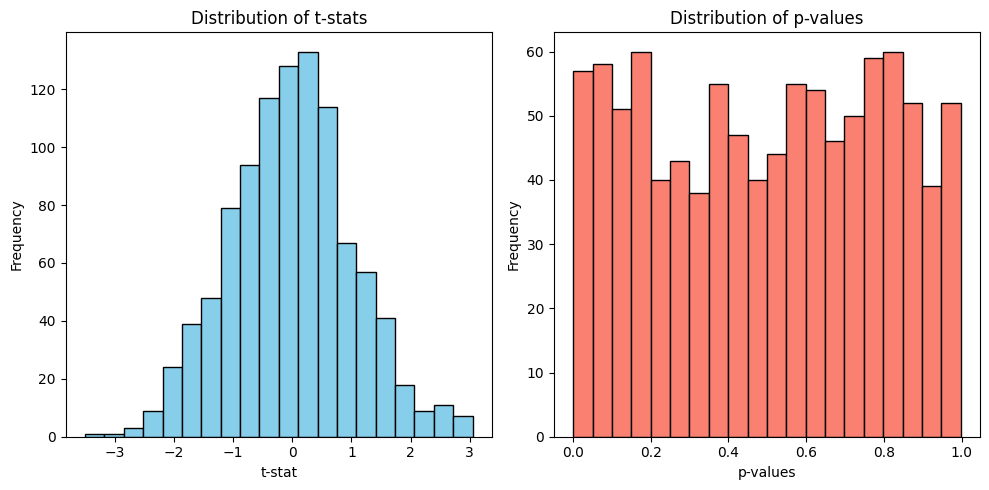

<Figure size 640x480 with 0 Axes>

In [3]:
datasimulation = simulation(1000,.05/12,.1/np.sqrt(12),120,.03/np.sqrt(12),0)
print('the amount of significant alphas is:')
print(sum(1 for i in datasimulation[1] if i>= 1.96))
print("running this multiple times, it seems the distribution of p values is roughly uniform from 0 to 1, and the distribution of t-values looks to be normal, with a standard deviation that's larger than one, but not by much.")

# Plot the distribution of t-values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(datasimulation[1], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of t-stats')
plt.xlabel('t-stat')
plt.ylabel('Frequency')

# Plot the distribution of p-values
plt.subplot(1, 2, 2)
plt.hist(datasimulation[2], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of p-values')
plt.xlabel('p-values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
plt.clf()




Part 2—Some Skilled Funds:
Now let’s add some skill to the true underlying distribution. Suppose that a fraction of funds
λ are truly skilled with alpha of 2.5% per year. What do the simulations and estimated
statistics look like now? Consider λ values of 0.1, 0.25, 0.5, and 0.75.
1. For each λ value, make a plot of the cross-sectional distribution of estimated α, their
t-stats, and the p-values. How does the p-value distribution change with the fraction
of truly skilled funds?
2. How many of the truly skilled funds have insignificant alpha estimates? And how many
of the truly unskilled funds are identified as skilled based on significantly positive alpha
estimates? For each λ value, report the percentage of funds in each of the following
classifications:
                Estimated Skill
                Y               N
 True Skill Y True Positive False Negative
            N False Positive True Negative



NOTE: You are expected to upload your code and output to your GitHub site. Please
also upload the PDF response document to Canvas, including a link to the GitHub code
repository.

pretty clearly as lambda increases, the distribution of p values becomes more and more skewed, with a majority of the weight moving towards a p value of 0
there are 0 investors/funds with nonzero alpha


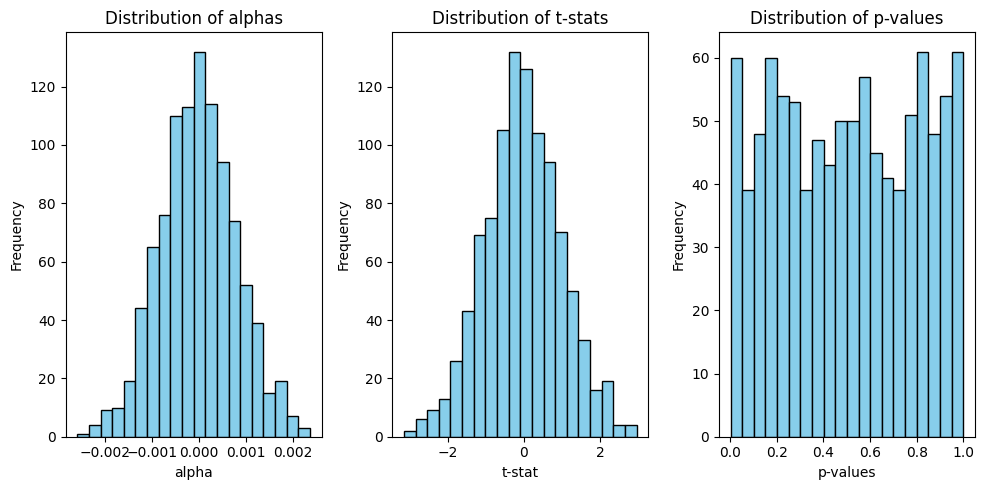

the number of true positives is 0 thus they make up 0.0 percent of the population
the number of false positives is 33 thus they make up 3.3 percent of the population
the number of true negatives is 967 thus they make up 96.7 percent of the population
the number of false negatives is 0 thus they make up 0.0 percent of the population

there are 100.0 investors/funds with nonzero alpha


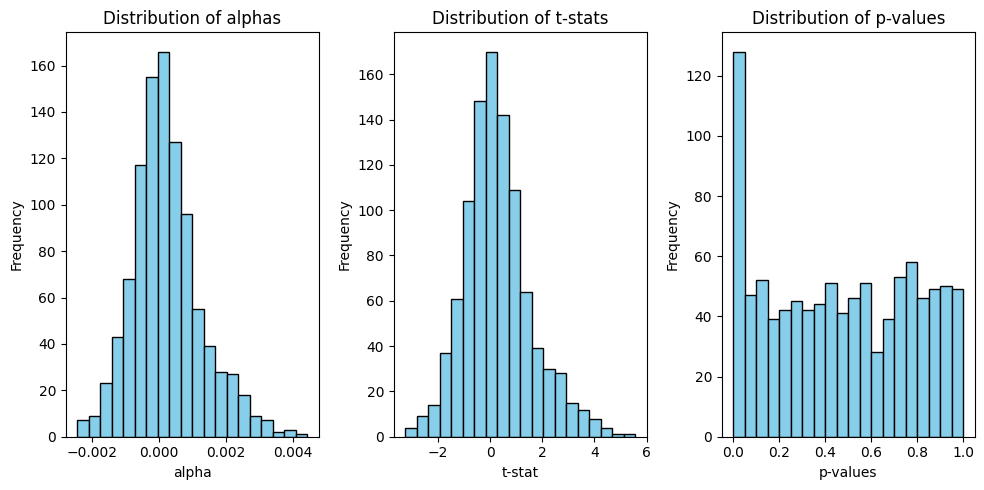

the number of true positives is 81 thus they make up 8.1 percent of the population
the number of false positives is 22 thus they make up 2.2 percent of the population
the number of true negatives is 878 thus they make up 87.8 percent of the population
the number of false negatives is 19 thus they make up 1.9 percent of the population

there are 250.0 investors/funds with nonzero alpha


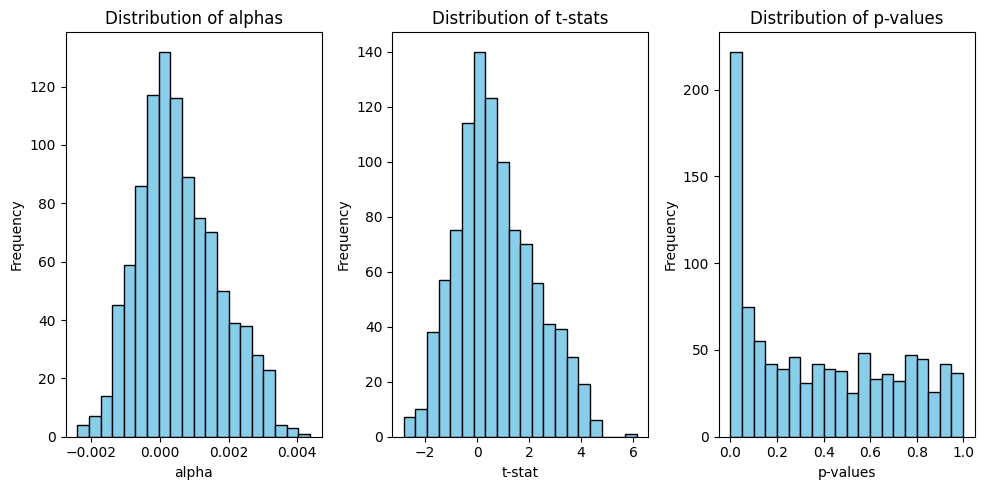

the number of true positives is 181 thus they make up 18.1 percent of the population
the number of false positives is 28 thus they make up 2.8 percent of the population
the number of true negatives is 722 thus they make up 72.2 percent of the population
the number of false negatives is 69 thus they make up 6.9 percent of the population

there are 500.0 investors/funds with nonzero alpha


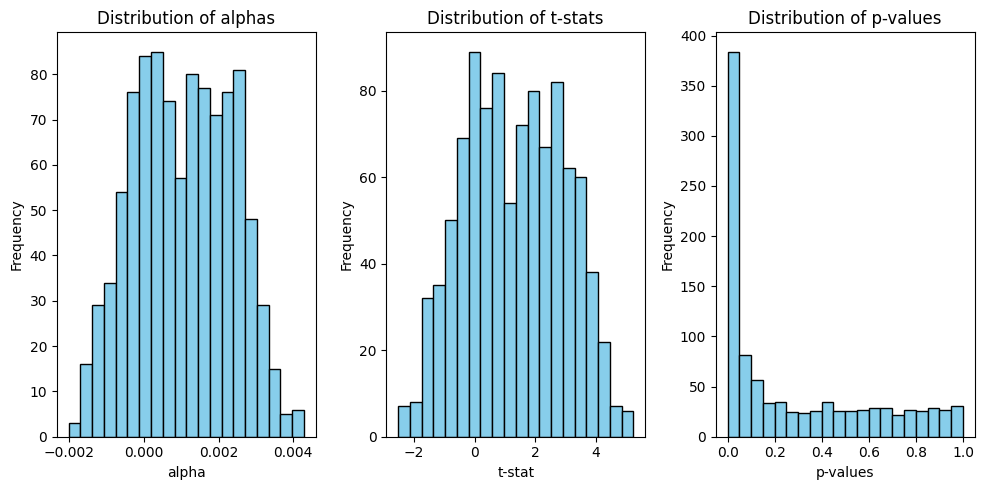

the number of true positives is 369 thus they make up 36.9 percent of the population
the number of false positives is 8 thus they make up 0.8 percent of the population
the number of true negatives is 492 thus they make up 49.2 percent of the population
the number of false negatives is 131 thus they make up 13.1 percent of the population

there are 750.0 investors/funds with nonzero alpha


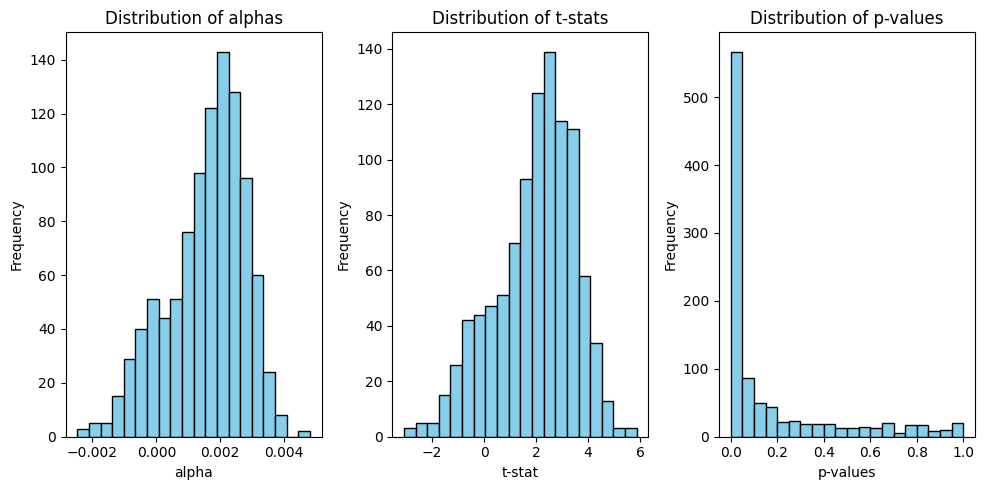

the number of true positives is 558 thus they make up 55.8 percent of the population
the number of false positives is 4 thus they make up 0.4 percent of the population
the number of true negatives is 246 thus they make up 24.6 percent of the population
the number of false negatives is 192 thus they make up 19.2 percent of the population



In [5]:
lambdavalues= [0,.1,.25,.5,.75]

print("pretty clearly as lambda increases, the distribution of p values becomes more and more skewed, with a majority of the weight moving towards a p value of 0")
for val in lambdavalues:

    plt.figure(figsize=(10, 5))
    val = 1000*val
    print("there are "+ str(val) + " investors/funds with nonzero alpha")
    hasalphadatasimulation = simulation(int(val),.05/12,.1/np.sqrt(12),120,.03/np.sqrt(12),.025)
    noalphadatasimulation = simulation(int(1000-val),.05/12,.1/np.sqrt(12),120,.03/np.sqrt(12),0)
    
    alldata = (hasalphadatasimulation[0]+noalphadatasimulation[0],hasalphadatasimulation[1]+noalphadatasimulation[1],hasalphadatasimulation[2]+noalphadatasimulation[2])
    # Plot the distribution of alphas
    
    plt.subplot(1, 3, 1)
    plt.hist(alldata[0], bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of alphas')
    plt.xlabel('alpha')
    plt.ylabel('Frequency')

    # Plot the distribution of t-values
    plt.subplot(1, 3, 2)
    plt.hist(alldata[1], bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of t-stats')
    plt.xlabel('t-stat')
    plt.ylabel('Frequency')

    # Plot the distribution of p-values
    plt.subplot(1, 3, 3)
    plt.hist(alldata[2], bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of p-values')
    plt.xlabel('p-values')
    plt.ylabel('Frequency')
    plt.tight_layout()
    
    

       
    plt.show()
    print("the number of true positives is "+str(sum(1 for i in hasalphadatasimulation[1] if i>= 1.96))+" thus they make up " + str(sum(1 for i in hasalphadatasimulation[1] if i>= 1.96)/10)+ ' percent of the population')
    print("the number of false positives is "+str(sum(1 for i in noalphadatasimulation[1] if i>= 1.96))+" thus they make up " + str(sum(1 for i in noalphadatasimulation[1] if i>= 1.96)/10)+ ' percent of the population')
    print("the number of true negatives is "+str(sum(1 for i in noalphadatasimulation[1] if i<= 1.96))+" thus they make up " + str(sum(1 for i in noalphadatasimulation[1] if i<= 1.96)/10)+ ' percent of the population')
    print("the number of false negatives is "+str(sum(1 for i in hasalphadatasimulation[1] if i<= 1.96))+" thus they make up " + str(sum(1 for i in hasalphadatasimulation[1] if i<= 1.96)/10)+ ' percent of the population')
    print(    )


    
